/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32080 (\N{CJK UNIFIED IDEOGRAPH-7D50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/gui/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canva

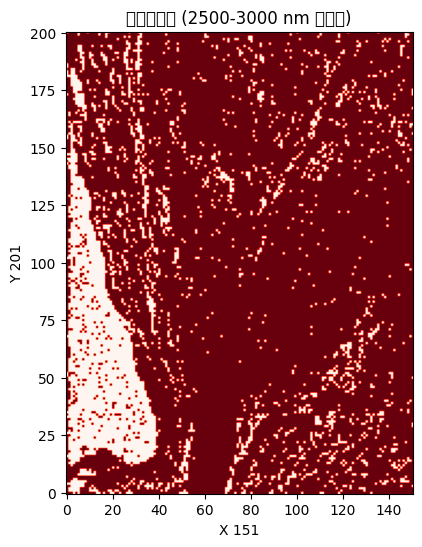

In [1]:
import numpy as np
from my_func.Read_ibw import read_ibw
import matplotlib.pyplot as plt

imchi3_data = read_ibw('/Users/ootahiroki/Library/CloudStorage/Box-Box/KanoLab/Raman/data/1008H38_151_201_imchi3_dataOrig.ibw')
# 波長軸を最後の次元に移動
imchi3_data = np.moveaxis(imchi3_data, 0, -1)  # 新しい形状: (151, 201, 1, 1148)

wavelengths = read_ibw('/Users/ootahiroki/Library/CloudStorage/Box-Box/KanoLab/Raman/data/1008H38_151_201_re_ramanshift2.ibw')


min_wavelength = 2500  # 最小波長（nm）
max_wavelength = 3000  # 最大波長（nm）


# 波長範囲に対応するインデックスを取得
wavelength_indices = np.where((wavelengths >= min_wavelength) & (wavelengths <= max_wavelength))[0]

# 強度の総和を計算（指定した波長範囲のみ）
intensity_sum = np.sum(imchi3_data[:, :, :, wavelength_indices], axis=-1) 

# 4. 閾値に基づくマスクの作成
threshold = 15  # データに応じて調整
mask = intensity_sum > threshold  # 形状: (151, 201, 1)

# マスクの形状を調整（z 軸を除去して2次元に）
if mask.shape[-1] == 1:
    mask_2d = mask[:, :, 0]
else:
    mask_2d = mask

# マスク結果の表示
cmap = plt.cm.get_cmap('Reds')
plt.figure(figsize=(8, 6))
plt.imshow(mask_2d.T, cmap=cmap, origin='lower')
plt.title(f'マスク結果 ({min_wavelength}-{max_wavelength} nm の範囲)')
plt.xlabel('X 151')
plt.ylabel('Y 201')
plt.show()


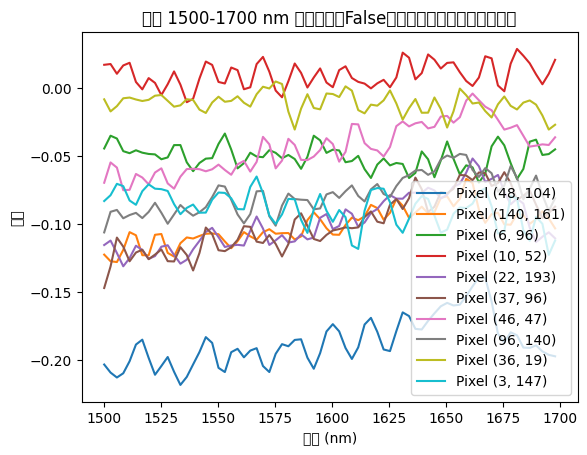

In [7]:
import numpy as np
from my_func.Read_ibw import read_ibw
import matplotlib.pyplot as plt

# データの読み込み
imchi3_data = read_ibw('/Users/ootahiroki/Library/CloudStorage/Box-Box/KanoLab/Raman/data/1008H38_151_201_imchi3_dataOrig.ibw')
# 波長軸を最後の次元に移動
imchi3_data = np.moveaxis(imchi3_data, 0, -1)  # 新しい形状: (151, 201, 1, 1148)

wavelengths = read_ibw('/Users/ootahiroki/Library/CloudStorage/Box-Box/KanoLab/Raman/data/1008H38_151_201_re_ramanshift2.ibw')

min_wavelength = 2500  # 最小波長（nm）
max_wavelength = 3000  # 最大波長（nm）

# 波長範囲に対応するインデックスを取得
wavelength_indices = np.where((wavelengths >= min_wavelength) & (wavelengths <= max_wavelength))[0]

# 強度の総和を計算（指定した波長範囲のみ）
intensity_sum = np.sum(imchi3_data[:, :, :, wavelength_indices], axis=-1) 

# 閾値に基づくマスクの作成
threshold = 35  # データに応じて調整
mask = intensity_sum > threshold  # 形状: (151, 201, 1)

# マスクの形状を調整（z 軸を除去して2次元に）
if mask.shape[-1] == 1:
    mask_2d = mask[:, :, 0]
else:
    mask_2d = mask

# マスクが False のピクセル位置を取得
false_indices = np.where(mask_2d == False)

# # False のピクセル数を制限（例えば、最大10個まで）
# max_plots = 10
# false_indices = np.where(mask_2d == False)

# # False ピクセルが多すぎる場合、一部だけを表示
# if len(false_indices[0]) > max_plots:
#     indices = np.random.choice(range(len(false_indices[0])), size=max_plots, replace=False)
# else:
#     indices = range(len(false_indices[0]))

# # 選ばれた False ピクセルのスペクトル情報を取得して可視化
# for i in indices:
#     x, y = false_indices[0][i], false_indices[1][i]
#     spectrum = imchi3_data[x, y, 0, :]  # 波長全体のスペクトルを取得
#     plt.plot(wavelengths, spectrum, label=f'Pixel ({x}, {y})')

# plt.title('マスクがFalseのピクセルのスペクトル情報')
# plt.xlabel('波長 (nm)')
# plt.ylabel('強度')
# plt.legend()
# plt.show()


# 波長範囲を限定（
min_plot_wavelength = 1500
max_plot_wavelength = 1700
plot_wavelength_indices = np.where((wavelengths >= min_plot_wavelength) & (wavelengths <= max_plot_wavelength))[0]

# 選ばれた False ピクセルのスペクトル情報を取得して可視化
for i in indices:
    x, y = false_indices[0][i], false_indices[1][i]
    spectrum = imchi3_data[x, y, 0, plot_wavelength_indices]  # 限定した波長範囲のスペクトルを取得
    plt.plot(wavelengths[plot_wavelength_indices], spectrum, label=f'Pixel ({x}, {y})')

plt.title(f'波長 {min_plot_wavelength}-{max_plot_wavelength} ')
plt.xlabel('波長 (nm)')
plt.ylabel('強度')
plt.legend()
plt.show()



